In [1]:
import parser
import json
import urllib
import pandas as pd
import imp
import numpy as np
import seaborn as sns
from tqdm import tqdm
import math

from sklearn.impute import SimpleImputer
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from PIL import Image
import matplotlib.pyplot as plt
import imdb_movie_content
from collections import Counter
%matplotlib inline
imp.reload(parser)
imp.reload(imdb_movie_content)

C:\Users\duygu\AppData\Local\Temp\ipykernel_12396\64185873.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'imdb_movie_content' from 'C:\\Users\\duygu\\Downloads\\final_project\\notebooks\\imdb_movie_content.py'>

In [2]:
df = parser.create_dataframe(r'C:\Users\duygu\Downloads\final_project\data\raw\movie_contents.json',r'C:\Users\duygu\Downloads\final_project\data\raw\movie_budget.json')
df.set_index('movie_title', inplace=True, drop=False)
df.sort_index(inplace=True)
awards_columns = [col for col in df.columns if 'nominated' in col or 'won' in col]
df_awards = df[awards_columns]
awards_per_movie = (len(awards_columns) - df_awards.isnull().sum(axis=1)).to_dict()
df['nb_awards'] = df['movie_title'].map(awards_per_movie)
df = df.drop_duplicates(['movie_title'])
df = df.rename(columns = {'director_fb_links': 'director_fb_likes'})

In [3]:
df

,title_year,storyline,contentRating,movie_imdb_link,color,country,keywords,num_voted_users,duration_sec,num_critic_for_reviews,...,Golden Globe_nominated_15,Golden Globe_nominated_16,BAFTA Film Award_won_5,BAFTA Film Award_nominated_10,BAFTA Film Award_won_6,BAFTA Film Award_nominated_11,Oscar_nominated_11,BAFTA Film Award_won_7,BAFTA Film Award_won_8,nb_awards
movie_title,,,,,,,,,,,,,,,,,,,,,
#Horror,2015,#HORROR is a film about the lives of six young...,Rated,http://www.imdb.com/title/tt3526286/,Color,USA,girl|bullying|cyberbullying|internet|art,None,6060.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...E tu vivrai nel terrore! L'aldil,1981,The cellar of an old hotel is built on top of ...,None,http://www.imdb.com/title/tt0082307/,Black and White,Italy,blindness|surrealism|hotel|hell|blind woman,None,5220.0,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10 Cloverfield Lane,2016,"After a car accident, Michelle awakens to find...",PG-13,http://www.imdb.com/title/tt1179933/,Color,USA,bunker|kidnapping|alien|minimal cast|held captive,None,6240.0,471.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10 Days in a Madhouse,2015,"In 1887, at age 23, reporter Nellie Bly, worki...",R,http://www.imdb.com/title/tt3453052/,Color,USA,,None,6660.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10 Things I Hate About You,1999,"Adapted from William Shakespeare's play ""The T...",PG-13,http://www.imdb.com/title/tt0147800/,Color,USA,protective father|shrew|dating|teen movie|school,None,5820.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ,1999,"Allegra Geller, the leading game designer in t...",R,http://www.imdb.com/title/tt0120907/,Color,Canada|UK,game|virtual reality|game designer|alternate r...,None,5820.0,194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
on Flux,2005,"400 years in the future, set in the year 2415,...",PG-13,http://www.imdb.com/title/tt0402022/,Color,USA,future|disease|f rated|female hero|based on cu...,None,5580.0,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
xXx,2002,"Xander ""XXX"" Cage is a thrill seeker who until...",PG-13,http://www.imdb.com/title/tt0295701/,Color,USA,athlete|mission|thrill seeker|russian|nsa agent,None,7440.0,201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


The following table gives an explanation of each column of our dataset.

# Data description

| Column name | Description |
| --- | --- | 
| title_year | The year in which the movie is released |
| storyline | short description about film |
| contentRating | Content rating of the movie |
| movie_imdb_link | imdb film link |
| color | color of the film |
| country | country of broadcasting |
| keywords | search keywords for the film |
| duration_sec | movie duration in minutes |
| num_critic_for_reviews | number of critics for the movie|
| director_facebook_likes | Number of likes for the Director on his Facebook Page |
| actor_3_facebook_likes |  Number of likes for the actor 3 on his/her facebook Page |
| actor2_name | name of the actor 2 |
| actor_1_facebook_likes | Number of likes for the actor 1 on his/her facebook Page |
| gross | Gross earnings of the movie in Dollars |
| genres | Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’ |
| actor_1_name | Name of the actor 1 |
| movie_title | Title of the movie |
| num_voted_users | Number of people who voted for the movie |
| cast_total_facebook_likes | Total facebook like for the movie |
| actor_3_name | Name of the actor 3|
| facenumber_in_poster | Number of actors who featured in the movie poster |
| num_user_for_reviews |  Number of users who gave a review |
| language |  Language of the movie |
| budget | Budget of the movie in Dollars |
| actor_2_facebook_likes | facebook likes for the actor 2 |
| imdb_score | IMDB score of the movie |
| aspect_ratio  | Aspect ratio the movie was made in |
| movie_facebook_likes | Total no of facebook likes for the movie |


# EDA | Explore the data

In [5]:
df.shape

(5112, 101)

In [6]:
df.describe()

,duration_sec,num_critic_for_reviews,num_facebook_like,idmb_score,num_user_for_reviews,director_fb_likes,total_cast_fb_likes,actor_1_fb_likes,actor_2_fb_likes,actor_3_fb_likes,worldwide_gross,production_budget,domestic_gross,nb_awards
count,4896.000000,5027.000000,5091.000000,5112.000000,5081.000000,4748.000000,1725.000000,1725.000000,1724.000000,1719.000000,4.380000e+03,4.380000e+03,4.380000e+03,5112.000000
mean,6449.264706,140.827133,9606.886859,6.439613,268.436528,1176.798441,28471.711884,11391.675942,5011.650232,3112.732403,9.091183e+07,3.193855e+07,4.262447e+07,1.511933
std,1246.499471,123.301086,19445.957939,1.115357,374.277415,3142.820605,28676.137614,21360.769248,4236.551810,2776.538298,1.693392e+08,4.062132e+07,6.528783e+07,4.171140
min,3720.000000,1.000000,2.000000,1.600000,1.000000,2.000000,32.000000,18.000000,2.000000,4.000000,0.000000e+00,1.400000e+03,0.000000e+00,0.000000
25%,5640.000000,49.000000,898.000000,5.800000,64.000000,30.000000,12625.000000,3800.000000,2100.000000,1300.000000,4.545704e+06,5.000000e+06,2.159168e+06,0.000000
50%,6180.000000,109.000000,2800.000000,6.600000,155.000000,118.000000,22697.000000,8000.000000,3600.000000,2400.000000,2.914407e+07,1.800000e+07,1.888002e+07,0.000000
75%,7020.000000,195.500000,9450.000000,7.200000,322.000000,554.000000,37574.000000,14000.000000,6700.000000,3900.000000,9.917579e+07,4.000000e+07,5.412534e+07,1.000000
max,22740.000000,815.000000,354000.000000,9.700000,5084.000000,33000.000000,765877.000000,726000.000000,27000.000000,23000.000000,2.783919e+09,4.250000e+08,7.605076e+08,32.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5112 entries, #Horror to xXx: State of the Union
Columns: 101 entries, title_year to nb_awards
dtypes: float64(13), int64(1), object(87)
memory usage: 4.0+ MB


In [8]:
df.dtypes

title_year                       object
storyline                        object
contentRating                    object
movie_imdb_link                  object
color                            object
                                  ...  
BAFTA Film Award_nominated_11    object
Oscar_nominated_11               object
BAFTA Film Award_won_7           object
BAFTA Film Award_won_8           object
nb_awards                         int64
Length: 101, dtype: object

# Descriptive Statistics

Describe the numerical variables

In [9]:
numericals = df.select_dtypes(np.number)
numericals

,duration_sec,num_critic_for_reviews,num_facebook_like,idmb_score,num_user_for_reviews,director_fb_likes,total_cast_fb_likes,actor_1_fb_likes,actor_2_fb_likes,actor_3_fb_likes,worldwide_gross,production_budget,domestic_gross,nb_awards
movie_title,,,,,,,,,,,,,,
#Horror,6060.0,36.0,824.0,3.2,54.0,40.0,NaN,NaN,NaN,NaN,0.0,1500000.0,0.0,0
...E tu vivrai nel terrore! L'aldil,5220.0,205.0,2300.0,6.9,258.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10 Cloverfield Lane,6240.0,471.0,39000.0,7.2,533.0,22.0,24358.0,14000.0,6500.0,3300.0,108286422.0,5000000.0,72082999.0,0
10 Days in a Madhouse,6660.0,1.0,26000.0,6.6,13.0,5100.0,NaN,NaN,NaN,NaN,14616.0,12000000.0,14616.0,0
10 Things I Hate About You,5820.0,134.0,11000.0,7.2,556.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ,5820.0,194.0,6300.0,6.8,531.0,2300.0,NaN,NaN,NaN,NaN,2840417.0,20700000.0,2840417.0,0
on Flux,5580.0,180.0,2500.0,5.5,532.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
xXx,7440.0,201.0,11000.0,5.8,745.0,364.0,37081.0,14000.0,8900.0,7500.0,267200000.0,70000000.0,141930000.0,0


Describe the categorical variables

In [11]:
categoricals=[column for column in df.columns if (df[column].dtype==object)] 
categoricals

['title_year',
 'storyline',
 'contentRating',
 'movie_imdb_link',
 'color',
 'country',
 'keywords',
 'num_voted_users',
 'movie_title',
 'image_urls',
 'language',
 'director_name',
 'production_co_1',
 'production_co_2',
 'production_co_3',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name',
 'release_date',
 'Oscar_nominated_1',
 'Oscar_nominated_2',
 'Oscar_nominated_3',
 'Golden Globe_nominated_1',
 'BAFTA Film Award_nominated_1',
 'BAFTA Film Award_nominated_2',
 'BAFTA Film Award_nominated_3',
 'BAFTA Film Award_nominated_4',
 'Golden Globe_nominated_2',
 'Oscar_won_1',
 'BAFTA Film Award_won_1',
 'Golden Globe_nominated_3',
 'Golden Globe_won_1',
 'Golden Globe_won_2',
 'Golden Globe_won_3',
 'Oscar_nominated_4',
 'BAFTA Film Award_nominated_5',
 'BAFTA Film Award_nominated_6',
 'BAFTA Film Award_nominated_7',
 "Palme d'Or_nominated_1",
 'Oscar_nominated_5',
 'Oscar_nominated_6',
 'Oscar_nominated_7',
 'Golden Globe_nominated_4',
 'Golden Globe_nominated_5',
 'Golden Globe_nomi

# Data Cleaning

In [12]:
df.isna().sum()

title_year                        115
storyline                          12
contentRating                    1066
movie_imdb_link                     0
color                              21
                                 ... 
BAFTA Film Award_nominated_11    5110
Oscar_nominated_11               5111
BAFTA Film Award_won_7           5110
BAFTA Film Award_won_8           5111
nb_awards                           0
Length: 101, dtype: int64

In [13]:
df_clean=df.fillna(0)
df_clean

,title_year,storyline,contentRating,movie_imdb_link,color,country,keywords,num_voted_users,duration_sec,num_critic_for_reviews,...,Golden Globe_nominated_15,Golden Globe_nominated_16,BAFTA Film Award_won_5,BAFTA Film Award_nominated_10,BAFTA Film Award_won_6,BAFTA Film Award_nominated_11,Oscar_nominated_11,BAFTA Film Award_won_7,BAFTA Film Award_won_8,nb_awards
movie_title,,,,,,,,,,,,,,,,,,,,,
#Horror,2015,#HORROR is a film about the lives of six young...,Rated,http://www.imdb.com/title/tt3526286/,Color,USA,girl|bullying|cyberbullying|internet|art,0,6060.0,36.0,...,0,0,0,0,0,0,0,0,0,0
...E tu vivrai nel terrore! L'aldil,1981,The cellar of an old hotel is built on top of ...,0,http://www.imdb.com/title/tt0082307/,Black and White,Italy,blindness|surrealism|hotel|hell|blind woman,0,5220.0,205.0,...,0,0,0,0,0,0,0,0,0,0
10 Cloverfield Lane,2016,"After a car accident, Michelle awakens to find...",PG-13,http://www.imdb.com/title/tt1179933/,Color,USA,bunker|kidnapping|alien|minimal cast|held captive,0,6240.0,471.0,...,0,0,0,0,0,0,0,0,0,0
10 Days in a Madhouse,2015,"In 1887, at age 23, reporter Nellie Bly, worki...",R,http://www.imdb.com/title/tt3453052/,Color,USA,,0,6660.0,1.0,...,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,1999,"Adapted from William Shakespeare's play ""The T...",PG-13,http://www.imdb.com/title/tt0147800/,Color,USA,protective father|shrew|dating|teen movie|school,0,5820.0,134.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ,1999,"Allegra Geller, the leading game designer in t...",R,http://www.imdb.com/title/tt0120907/,Color,Canada|UK,game|virtual reality|game designer|alternate r...,0,5820.0,194.0,...,0,0,0,0,0,0,0,0,0,0
on Flux,2005,"400 years in the future, set in the year 2415,...",PG-13,http://www.imdb.com/title/tt0402022/,Color,USA,future|disease|f rated|female hero|based on cu...,0,5580.0,180.0,...,0,0,0,0,0,0,0,0,0,0
xXx,2002,"Xander ""XXX"" Cage is a thrill seeker who until...",PG-13,http://www.imdb.com/title/tt0295701/,Color,USA,athlete|mission|thrill seeker|russian|nsa agent,0,7440.0,201.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_clean.isna().sum()

title_year                       0
storyline                        0
contentRating                    0
movie_imdb_link                  0
color                            0
                                ..
BAFTA Film Award_nominated_11    0
Oscar_nominated_11               0
BAFTA Film Award_won_7           0
BAFTA Film Award_won_8           0
nb_awards                        0
Length: 101, dtype: int64

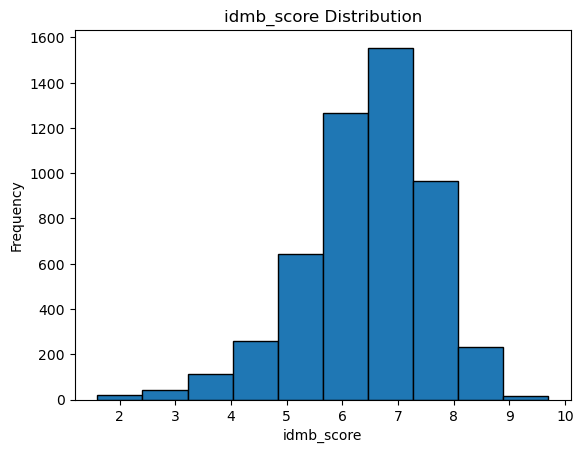

In [18]:
# Create a histogram of salary
plt.hist(df['idmb_score'], bins=10, edgecolor='k')
plt.xlabel('idmb_score')
plt.ylabel('Frequency')
plt.title('idmb_score Distribution')
plt.show()

In [20]:
df["language"].value_counts()

English                                                                 3286
English|Spanish                                                          238
English|French                                                           132
English|Italian                                                           58
English|German                                                            56
                                                                        ... 
English|Czech|German|Dutch|Slovak|Japanese|Icelandic|Russian|Spanish       1
French|English|Chinese                                                     1
English|Khmer|Vietnamese                                                   1
Norwegian|Danish|Russian|English                                           1
English|German|Spanish|Russian|Czech                                       1
Name: language, Length: 674, dtype: int64

94 % of the movie is english

In [22]:
value_counts=df["country"].value_counts()
print(value_counts)

USA                                  3082
UK|USA                                140
UK                                    131
USA|Germany                           117
USA|Canada                            106
                                     ... 
Norway|Sweden|Denmark|Germany           1
France|Italy|Romania                    1
USA|Morocco                             1
Mexico|Netherlands|Germany|France       1
China|South Korea|USA                   1
Name: country, Length: 617, dtype: int64


We can see most of the movies are from USA ,UK and the rest of the countries